In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from patsy import dmatrices
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error 

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('CAS_modified .csv')
pd.set_option('display.max_columns',None)
df.head()

,Unnamed: 0,X,Y,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,crashFinancialYear,crashLocation1,crashLocation2,crashSeverity,crashSHDescription,crashYear,debris,directionRoleDescription,ditch,fatalCount,fence,flatHill,guardRail,houseOrBuilding,kerb,light,minorInjuryCount,moped,motorcycle,NumberOfLanes,objectThrownOrDropped,otherObject,otherVehicleType,overBank,parkedVehicle,phoneBoxEtc,postOrPole,region,roadCharacter,roadLane,roadSurface,roadworks,schoolBus,seriousInjuryCount,slipOrFlood,speedLimit,strayAnimal,streetLight,suv,taxi,tlaName,trafficControl,trafficIsland,trafficSign,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA
0,0,1772561.0,5896382.0,0.0,0.0,0.0,1.0,0.0,None,2007/2008,EAST ST,ELLIOT ST,Non-Injury Crash,No,2007,0.0,North,0.0,0.0,0.0,Flat,0.0,0.0,0.0,Dark,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Auckland Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,50.0,0.0,On,1.0,0.0,Auckland,Traffic Signals,0.0,0.0,0.0,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine
1,1,1836757.0,5859311.0,0.0,0.0,0.0,2.0,0.0,None,2002/2003,SH 2,SH 26,Non-Injury Crash,Yes,2003,0.0,North,0.0,0.0,0.0,Flat,0.0,0.0,0.0,Dark,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Waikato Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,50.0,0.0,On,0.0,0.0,Hauraki District,Give way,0.0,0.0,0.0,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine
2,2,1762088.0,5912507.0,0.0,0.0,0.0,1.0,0.0,West,2009/2010,CHURCH ST,HUGO JOHNSTON DRIVE,Non-Injury Crash,No,2010,0.0,East,0.0,0.0,0.0,Flat,0.0,0.0,0.0,Bright sun,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Auckland Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,50.0,0.0,Off,0.0,0.0,Auckland,Traffic Signals,0.0,0.0,0.0,0.0,0.0,0.0,Urban,1.0,0.0,0.0,Fine
3,3,1753522.0,5911939.0,0.0,0.0,0.0,2.0,0.0,None,2017/2018,THE AVENUE,ACCESSWAY,Minor Crash,No,2017,0.0,North,0.0,0.0,0.0,Hill Road,0.0,0.0,0.0,Overcast,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Auckland Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,50.0,0.0,None,0.0,0.0,Auckland,Nil,0.0,0.0,0.0,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Light rain
4,4,1761364.0,5914259.0,0.0,0.0,0.0,2.0,0.0,None,2017/2018,PENROSE INT,GT SOUTH LINK,Non-Injury Crash,No,2018,0.0,North,0.0,0.0,0.0,Flat,0.0,0.0,0.0,Overcast,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Auckland Region,Motorway ramp,1-way,Sealed,0.0,0.0,0.0,0.0,50.0,0.0,None,0.0,0.0,Auckland,Give way,0.0,0.0,0.0,0.0,0.0,0.0,Urban,0.0,0.0,0.0,Fine


In [3]:
np.random.seed(99)
mask = np.random.rand(len(df)) <= 0.8
train_data = df[mask]
test_data = df[~mask]

In [4]:
from sklearn.feature_selection import RFE

def Feature_imp(Model,n,X,y):
    model = Model
    # create the RFE model and select attributes
    rfe = RFE(model,n_features_to_select= n)
    rfe = rfe.fit(X, y)
    # summarize the selection of the attributes
    return pd.DataFrame({'Decision':rfe.support_,'Ranking':rfe.ranking_,'Feature':X.columns})

In [5]:
df.seriousInjuryCount.mean()

0.06874822001801567

In [6]:
df.seriousInjuryCount.var()

0.09065634861005963

### Poisson GLM Regression

In [7]:
formula = "seriousInjuryCount ~ bicycle+bridge+bus+carStationWagon+cliffBank+crashYear+debris+ditch+fence+flatHill+guardRail+houseOrBuilding+kerb+light+moped+motorcycle+NumberOfLanes+objectThrownOrDropped+otherObject+otherVehicleType+overBank+parkedVehicle+postOrPole+region+roadCharacter+roadLane+roadSurface+roadworks+schoolBus+slipOrFlood+speedLimit+strayAnimal+streetLight+suv+taxi+trafficControl+trafficIsland+trafficSign+train+tree+truck+unknownVehicleType+urban+vanOrUtility+vehicle+waterRiver+weatherA"
y,X = dmatrices(formula, train_data, return_type='dataframe')
X.drop("Intercept",axis=1,inplace=True)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=9)

In [9]:
%%time
Feature = Feature_imp(PoissonRegressor(),11,X_train,y_train)

Wall time: 3min 50s


In [10]:
Feature[Feature.Decision==True].Feature

3               light[T.Overcast]
7     region[T.Canterbury Region]
30              roadLane[T.2-way]
36             streetLight[T.Off]
44      trafficControl[T.Unknown]
52                        bicycle
55                carStationWagon
65                     motorcycle
66                  NumberOfLanes
76                     speedLimit
83                           tree
Name: Feature, dtype: object

In [11]:
X_train_poi = X[['light[T.Overcast]','region[T.Canterbury Region]','roadLane[T.2-way]','streetLight[T.Off]','trafficControl[T.Unknown]','bicycle','carStationWagon','motorcycle','NumberOfLanes','speedLimit','tree']]
y_train_poi = y

In [12]:
model_poisson = sm.GLM(y_train_poi, X_train_poi,family=sm.families.Poisson(link=sm.families.links.log())).fit()

In [33]:
model_poisson.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     seriousInjuryCount   No. Observations:               620746
Model:                            GLM   Df Residuals:                   620735
Model Family:                 Poisson   Df Model:                           10
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.5826e+05
Date:                Mon, 18 Apr 2022   Deviance:                   2.3989e+05
Time:                        13:35:57   Pearson chi2:                 1.19e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
light[T.Overcast]              -0.2765      0.011    -25.651      0.000      -0.298      -0.255
region[T.Canterbury Region]     0.0332      0.015      2.276      0.023       0.005       0.062
roadLane[T.2-way]              -0.4753      0.013    -37.324      0.000      -0.500      -0.450
streetLight[T.Off]             -0.5908      0.014    -43.661      0.000      -0.617      -0.564
trafficControl[T.Unknown]      -0.0729      0.010     -6.955      0.000      -0.093      -0.052
bicycle                         0.5614      0.017     32.302      0.000       0.527       0.595
carStationWagon                -0.6926      0.006   -110.271      0.000      -0.705      -0.680
motorcycle                      0.8069      0.011     75.481      0.000       0.786       0.828
NumberOfLanes                  -0.5099      0.007    -77.369      0.000      -0.523      -0.497
speedLimit                     -0.0033      0.000    -20.192      0.000      -0.004      -0.003
tree                            0.3755      0.018     21.204      0.000       0.341       0.410
===============================================================================================
"""

In [34]:
print(dir(model_poisson))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_data_attr_model', '_data_in_cache', '_endog', '_freq_weights', '_get_robustcov_results', '_iweights', '_n_trials', '_use_t', '_var_weights', 'aic', 'bic', 'bic_deviance', 'bic_llf', 'bse', 'conf_int', 'converged', 'cov_kwds', 'cov_params', 'cov_type', 'deviance', 'df_model', 'df_resid', 'f_test', 'family', 'fit_history', 'fittedvalues', 'get_hat_matrix_diag', 'get_influence', 'get_prediction', 'initialize', 'k_constant', 'llf', 'llnull', 'load', 'method', 'mle_settings', 'model', 'mu', 'nobs', 'normalized_cov_params', 'null', 'null_deviance', 'params', 'pearson_chi2', 'plot_added_variable', 'plot_ceres_residuals', 'plot_p

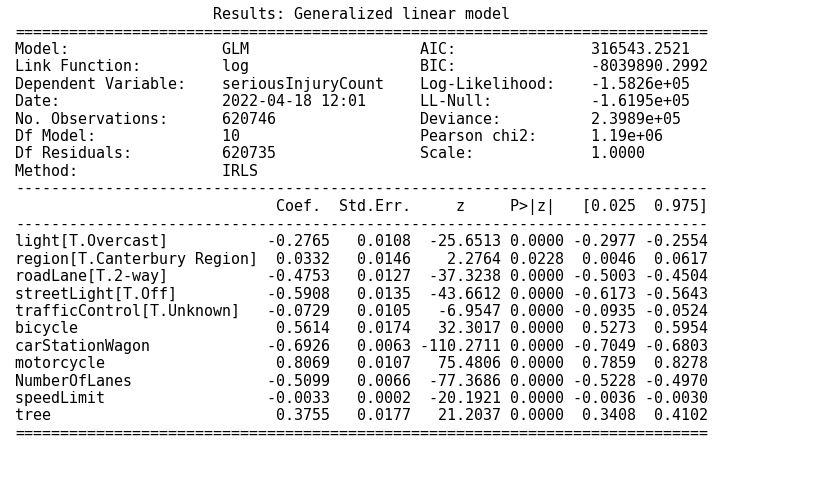

In [32]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(model_poisson.summary2()), {'fontsize': 15}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('output.png')

In [14]:
def calculate_residuals(model, features, label):
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label.squeeze(1), 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    df_results['Residuals_per'] = (abs(df_results['Actual']) - abs(df_results['Predicted']))/df_results['Actual']
    
    return df_results

In [15]:
df_results = calculate_residuals(model_poisson,X_train_poi,y_train_poi)
df_results.tail()

,Actual,Predicted,Residuals,Residuals_per
775985,1.0,0.160350,0.839650,0.83965
775986,0.0,0.371096,-0.371096,-inf
775987,0.0,0.066571,-0.066571,-inf
775988,0.0,0.041761,-0.041761,-inf
775989,0.0,0.161420,-0.161420,-inf


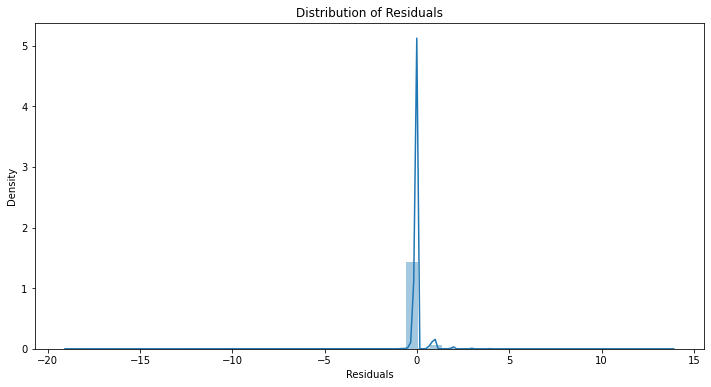

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(df_results['Residuals'])
plt.show()

In [17]:
X_train_poi.shape

(620746, 11)

In [18]:
y_train_poi.shape

(620746, 1)

In [19]:
y_train_poi.seriousInjuryCount.value_counts()

0.0     584062
1.0      32201
2.0       3453
3.0        717
4.0        210
5.0         70
6.0         17
7.0          7
8.0          3
10.0         3
12.0         1
9.0          1
14.0         1
Name: seriousInjuryCount, dtype: int64

In [20]:
pd.Series(np.round(df_results.Predicted)).value_counts()

0.0     618095
1.0       2468
2.0        141
3.0         17
4.0         13
5.0          3
8.0          3
9.0          2
11.0         1
14.0         1
7.0          1
19.0         1
Name: Predicted, dtype: int64

### Quasipoisson GLM


In [21]:
formula = "seriousInjuryCount ~ bicycle+bridge+bus+carStationWagon+cliffBank+crashSeverity+crashSHDescription+crashYear+debris+ditch+fatalCount+fence+flatHill+guardRail+houseOrBuilding+kerb+light+minorInjuryCount+moped+motorcycle+NumberOfLanes+objectThrownOrDropped+otherObject+otherVehicleType+overBank+parkedVehicle+postOrPole+region+roadCharacter+roadLane+roadSurface+roadworks+schoolBus+slipOrFlood+speedLimit+strayAnimal+streetLight+suv+taxi+trafficControl+trafficIsland+trafficSign+train+tree+truck+unknownVehicleType+urban+vanOrUtility+vehicle+waterRiver+weatherA"
y_train,X_train = dmatrices(formula, train_data, return_type='dataframe')

In [22]:
main_df = y_train.join(X_train)
main_df.head()

,seriousInjuryCount,Intercept,crashSeverity[T.Minor Crash],crashSeverity[T.Non-Injury Crash],crashSeverity[T.Serious Crash],crashSHDescription[T.Unknown],crashSHDescription[T.Yes],flatHill[T.Hill Road],flatHill[T.None],light[T.Dark],light[T.Overcast],light[T.Twilight],light[T.Unknown],region[T.Bay of Plenty Region],region[T.Canterbury Region],region[T.Gisborne Region],region[T.Hawke's Bay Region],region[T.Manawatū-Whanganui Region],region[T.Marlborough Region],region[T.Nelson Region],region[T.None],region[T.Northland Region],region[T.Otago Region],region[T.Southland Region],region[T.Taranaki Region],region[T.Tasman Region],region[T.Waikato Region],region[T.Wellington Region],region[T.West Coast Region],roadCharacter[T.Motorway ramp],roadCharacter[T.Nil],roadCharacter[T.Overpass],roadCharacter[T.Rail xing],roadCharacter[T.Speed hump],roadCharacter[T.Tram lines],roadCharacter[T.Tunnel],roadCharacter[T.Underpass],roadLane[T.2-way],roadLane[T.None],roadLane[T.Off road],roadSurface[T.None],roadSurface[T.Sealed],roadSurface[T.Unsealed],streetLight[T.Off],streetLight[T.On],trafficControl[T.Isolated Pedestrian signal (non-intersection)],trafficControl[T.Nil],trafficControl[T.Pointsman],trafficControl[T.School Patrol/warden],trafficControl[T.Stop],trafficControl[T.Traffic Signals],trafficControl[T.Unknown],urban[T.Urban],weatherA[T.Hail or Sleet],weatherA[T.Heavy rain],weatherA[T.Light rain],weatherA[T.Mist or Fog],weatherA[T.None],weatherA[T.Snow],bicycle,bridge,bus,carStationWagon,cliffBank,crashYear,debris,ditch,fatalCount,fence,guardRail,houseOrBuilding,kerb,minorInjuryCount,moped,motorcycle,NumberOfLanes,objectThrownOrDropped,otherObject,otherVehicleType,overBank,parkedVehicle,postOrPole,roadworks,schoolBus,slipOrFlood,speedLimit,strayAnimal,suv,taxi,trafficIsland,trafficSign,train,tree,truck,unknownVehicleType,vanOrUtility,vehicle,waterRiver
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2007.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2003.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2017.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2010.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2014.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [23]:
dff = X_train_poi.join(y_train_poi)
dff.head()

,light[T.Overcast],region[T.Canterbury Region],roadLane[T.2-way],streetLight[T.Off],trafficControl[T.Unknown],bicycle,carStationWagon,motorcycle,NumberOfLanes,speedLimit,tree,seriousInjuryCount
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,50.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,50.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,50.0,0.0,0.0
5,1.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,2.0,50.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,50.0,0.0,0.0


In [24]:
dff.rename(columns = {'light[T.Overcast]':'lightO','region[T.Canterbury Region]':'regionC','roadLane[T.2-way]':'roadLane2','streetLight[T.Off]':'streetLightO','trafficControl[T.Unknown]':'trafficControlU'},inplace=True)

In [25]:
#dff.drop(dff['lightO'],axis=1,inplace=True)

In [26]:
dff.columns

Index(['lightO', 'regionC', 'roadLane2', 'streetLightO', 'trafficControlU',
       'bicycle', 'carStationWagon', 'motorcycle', 'NumberOfLanes',
       'speedLimit', 'tree', 'seriousInjuryCount'],
      dtype='object')

In [27]:
from glm.glm import GLM
from glm.families import QuasiPoisson
qmodel = GLM(family=QuasiPoisson())
qmodel.fit(dff,formula='seriousInjuryCount ~ regionC+roadLane2+streetLightO+trafficControlU+bicycle+carStationWagon+motorcycle+NumberOfLanes+speedLimit+tree')
print(qmodel.summary())

QuasiPoisson GLM Model Summary.
Name                Parameter Estimate  Standard Error
------------------------------------------------------
Intercept                        -3.82            0.02
regionC                           0.18            0.01
roadLane2                         0.61            0.01
streetLightO                     -0.27            0.01
trafficControlU                   0.05            0.01
bicycle                           0.97            0.01
carStationWagon                  -0.28            0.00
motorcycle                        0.98            0.01
NumberOfLanes                    -0.12            0.00
speedLimit                        0.02            0.00
tree                              0.50            0.01
None


In [28]:
qmodel.dispersion_

array(0.35853054)

In [29]:
qmodel.p_values_

array([0.00000000e+000, 2.24841314e-092, 0.00000000e+000, 2.28301346e-230,
       5.10059348e-012, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       2.22435976e-211, 0.00000000e+000, 0.00000000e+000])